In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

In [2]:
testResults2 = dit.multi.runTest(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=4000,
                                templateNoNoise=False, skyLimited=False,
                                sky=[300., 300.], sourceFluxRange=(500,30000),
                                remeasurePsfs=[True, True], avoidAllOverlaps=0., 
                                returnObj=True, printErrs=True)

In [3]:
testResults2['resultInputPsf']

{'ALstack': {'FN': 11, 'FP': 11, 'TP': 39},
 'ALstack_decorr': {'FN': 30, 'FP': 1, 'TP': 20},
 'SZOGY': {'FN': 32, 'FP': 4, 'TP': 18},
 'ZOGY': {'FN': 27, 'FP': 3, 'TP': 23}}

In [4]:
testResults2['resultMeasuredPsf']

{'ALstack': {'FN': 11, 'FP': 11, 'TP': 39},
 'ALstack_decorr': {'FN': 30, 'FP': 1, 'TP': 20},
 'SZOGY': {'FN': 42, 'FP': 9, 'TP': 8},
 'ZOGY': {'FN': 30, 'FP': 30, 'TP': 20},
 'sources': {'ALstack': <lsst.afw.table.tableLib.SourceCatalog; proxy of <Swig Object of type 'lsst::afw::table::SortedCatalogT< lsst::afw::table::SourceRecord > *' at 0x1068115d0> >,
  'ALstack_decorr': <lsst.afw.table.tableLib.SourceCatalog; proxy of <Swig Object of type 'lsst::afw::table::SortedCatalogT< lsst::afw::table::SourceRecord > *' at 0x1203c4930> >,
  'SZOGY': <lsst.afw.table.tableLib.SourceCatalog; proxy of <Swig Object of type 'lsst::afw::table::SortedCatalogT< lsst::afw::table::SourceRecord > *' at 0x1203a2cc0> >,
  'ZOGY': <lsst.afw.table.tableLib.SourceCatalog; proxy of <Swig Object of type 'lsst::afw::table::SortedCatalogT< lsst::afw::table::SourceRecord > *' at 0x1203a2360> >}}

In [6]:
n_runs = 5 # 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
ns = ns[::2]
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620., 
                                             n_varSources=50, nStaticSources=ns,
                                             templateNoNoise=False, skyLimited=False,
                                             sky=[300., 300.], sourceFluxRange=(500,30000),
                                             avoidAllOverlaps=0.,
                                             n_runs=n_runs, remeasurePsfs=[True, True])

RUNNING: 65
CORES: 4

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Poi

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.6min


ERROR RUNNING SEED: 66
Weights sum to zero, can't be normalized
ERROR RUNNING SEED: 66


[Parallel(n_jobs=4)]: Done  65 out of  65 | elapsed:  8.8min finished


FN: 
ALstack           34.052632
ALstack_decorr    48.315789
SZOGY             48.842105
ZOGY              45.122807
dtype: float64
FP: 
ALstack            9.526316
ALstack_decorr     1.614035
SZOGY             11.438596
ZOGY              30.842105
dtype: float64
TP: 
ALstack           15.947368
ALstack_decorr     1.684211
SZOGY              1.157895
ZOGY               4.877193
dtype: float64


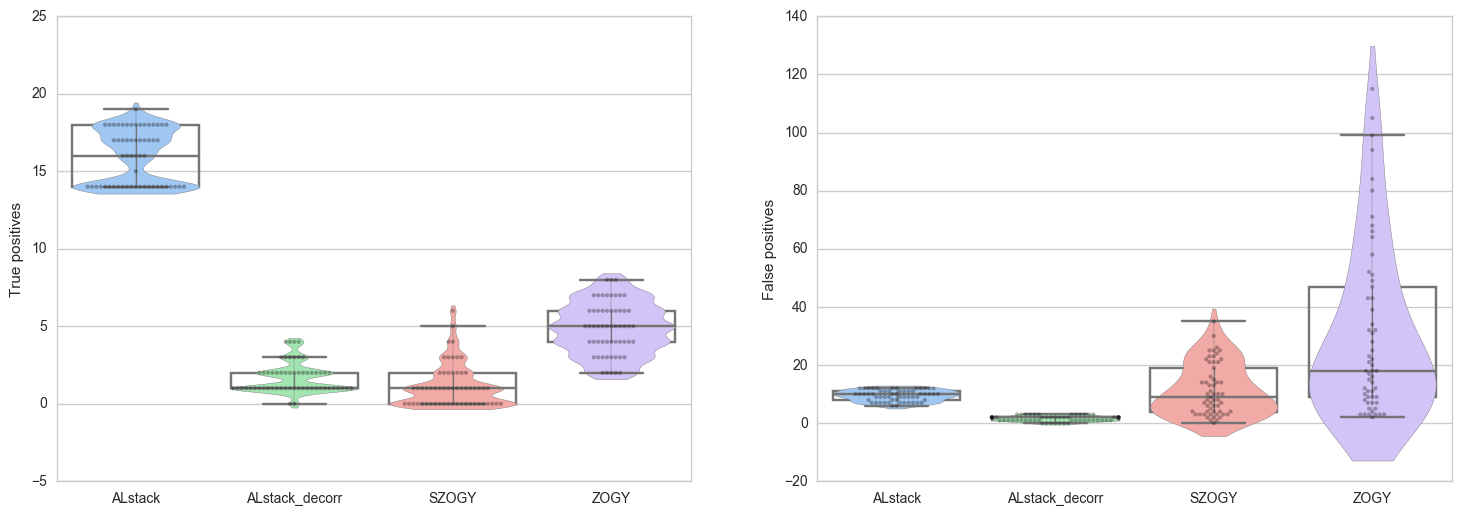

In [7]:
tr = testResults2
tr = [t for t in tr if t is not None and t['resultMeasuredPsf']]
dit.multi.plotResults(tr, resultKey='resultMeasuredPsf');

OK, running the "new" `dit.multi.runTest()` using the new ZOGY implementation seems to have problems.

I'm going to simply replace the call to `DiffimTest()` in `dit.multi.runTest()` with the `ditOLD.DiffimTest()` method, and re-run. Cross-fingers.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#import diffimTests_OLD as ditOLD
#reload(ditOLD);
import diffimTests_OLD_multi as ditMultiOLD
reload(ditMultiOLD);

In [2]:
testResults = ditMultiOLD.runTest(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=1000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=300., sourceFluxRange=(500,30000),
                                remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                returnObj=True, printErrs=True)

In [3]:
testResults['resultInputPsf']

{'ALstack': {'FN': 38, 'FP': 3, 'TP': 9},
 'ALstack_noDecorr': {'FN': 41, 'FP': 5, 'TP': 7},
 'SZOGY': {'FN': 41, 'FP': 12, 'TP': 6},
 'ZOGY': {'FN': 38, 'FP': 29, 'TP': 9}}

In [4]:
testResults['resultMeasuredPsf']

{'ALstack': {'FN': 38, 'FP': 3, 'TP': 9},
 'ALstack_noDecorr': {'FN': 41, 'FP': 5, 'TP': 7},
 'SZOGY': {'FN': 43, 'FP': 35, 'TP': 5},
 'ZOGY': {'FN': 38, 'FP': 53, 'TP': 7}}

Copy `runTest` from notebook #28 to `runTestORIG`.

In [7]:
testResults2 = ditMultiOLD.runTestORIG(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=1000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=300.) #, #sourceFluxRange=(500,30000),
                                #remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                #returnObj=True, printErrs=True)

In [10]:
#del testResults2['inputPsf1'], testResults2['inputPsf2'], testResults2['psf1'], testResults2['psf2']
print testResults2['diffimResInputPsf']
print testResults2['diffimResMeasuredPsf']

{'ZOGY': {'FP': 5, 'FN': 27, 'TP': 23}, 'ALstack': {'FP': 6, 'FN': 37, 'TP': 13}, 'SZOGY': {'FP': 7, 'FN': 35, 'TP': 15}, 'ALstack_noDecorr': {'FP': 6, 'FN': 31, 'TP': 19}}
{'ZOGY': {'FP': 6, 'FN': 28, 'TP': 22}, 'ALstack': {'FP': 6, 'FN': 37, 'TP': 13}, 'SZOGY': {'FP': 6, 'FN': 33, 'TP': 17}, 'ALstack_noDecorr': {'FP': 6, 'FN': 31, 'TP': 19}}


Seems to work! So something is wrong with the new `runTest`.

Now update `runTestOrig` to use new dit.DiffimTest...

In [2]:
testResults3 = ditMultiOLD.runTestORIG(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=1000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=300., #sourceFluxRange=(500,30000),
                                #remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                #returnObj=True, 
                                       printErrs=True)

HERE: Fspace
HERE: Fspace


In [3]:
print testResults3['diffimResInputPsf']
print testResults3['diffimResMeasuredPsf']

{'ZOGY': {'FP': 2, 'FN': 24, 'TP': 26}, 'ALstack': {'FP': 9, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 4, 'FN': 31, 'TP': 19}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}
{'ZOGY': {'FP': 5, 'FN': 29, 'TP': 21}, 'ALstack': {'FP': 10, 'FN': 22, 'TP': 28}, 'SZOGY': {'FP': 5, 'FN': 32, 'TP': 18}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}


In [10]:
testResults3 = ditMultiOLD.runTestORIG(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=4000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=300., #sourceFluxRange=(500,30000),
                                #remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                #returnObj=True, 
                                       returnObjs=True, printErrs=True)

HERE: Fspace
HERE: Fspace


In [5]:
print testResults3['diffimResInputPsf']
print testResults3['diffimResMeasuredPsf']

{'ZOGY': {'FP': 2, 'FN': 24, 'TP': 26}, 'ALstack': {'FP': 9, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 4, 'FN': 31, 'TP': 19}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}
{'ZOGY': {'FP': 4, 'FN': 26, 'TP': 24}, 'ALstack': {'FP': 9, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 6, 'FN': 32, 'TP': 18}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}


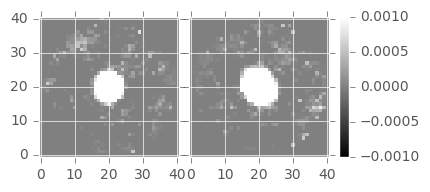

In [12]:
ditOLD.plotImageGrid((testResults3['objs'][1].im1.psf, testResults3['objs'][1].im2.psf), clim=(-0.001, 0.001))

OK, it seemed to work (using the original `runTest` but the new `DiffimTest` (and ZOGY) algorithm. Something is definitely wrong with the new `multi.runTest`.

So, let's narrow it down -- try now using the new PSF measurement in the old `runTest`.

In [2]:
testResults4 = ditMultiOLD.runTestORIG(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=4000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=300., #sourceFluxRange=(500,30000),
                                #remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                #returnObj=True, 
                                       returnObjs=True, printErrs=True)

IN NEW MAKEFAKEIMAGES
HERE: NEW DETECTION
HERE: NEW DETECTION
IN NEW MAKEFAKEIMAGES
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION


In [3]:
print testResults4['diffimResInputPsf']
print testResults4['diffimResMeasuredPsf']

{'ZOGY': {'FP': 2, 'FN': 24, 'TP': 26}, 'ALstack': {'FP': 9, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 4, 'FN': 31, 'TP': 19}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}
{'ZOGY': {'FP': 4, 'FN': 27, 'TP': 23}, 'ALstack': {'FP': 8, 'FN': 20, 'TP': 30}, 'SZOGY': {'FP': 5, 'FN': 31, 'TP': 19}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}


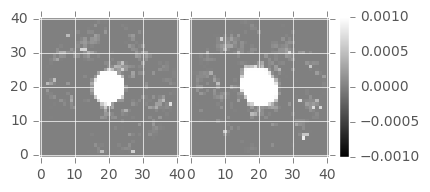

In [7]:
ditOLD.plotImageGrid((testResults4['objs'][1].im1.psf, testResults4['objs'][1].im2.psf), clim=(-0.001, 0.001))

Nice, the new PSF measure does NOT seem to be the problem. Try using other new methods (rather than old methods) to see which might be the culprit.

In [2]:
testResults5 = ditMultiOLD.runTestORIG(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=4000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=300., #sourceFluxRange=(500,30000),
                                #remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                #returnObj=True, 
                                       returnObjs=True, printErrs=True)

HERE: NEW PSF MEASURE
HERE: NEW PSF MEASURE


In [3]:
print testResults5['diffimResInputPsf']
print testResults5['diffimResMeasuredPsf']

{'ZOGY': {'FP': 2, 'FN': 24, 'TP': 26}, 'ALstack': {'FP': 9, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 4, 'FN': 31, 'TP': 19}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}
{'ZOGY': {'FP': 4, 'FN': 27, 'TP': 23}, 'ALstack': {'FP': 8, 'FN': 20, 'TP': 30}, 'SZOGY': {'FP': 5, 'FN': 31, 'TP': 19}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}


Whew, getting somewhere. Now finally see if the ZOGY image space version is at fault.

In [2]:
testResults6 = ditMultiOLD.runTestORIG(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=4000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=300., #sourceFluxRange=(500,30000),
                                #remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                #returnObj=True, 
                                       returnObjs=True, printErrs=True)

HERE: ZOGY NEW (I space)
HERE: NEW PSF MEASURE
HERE: NEW PSF MEASURE
HERE: ZOGY NEW (I space)


In [3]:
print testResults6['diffimResInputPsf']
print testResults6['diffimResMeasuredPsf']

{'ZOGY': {'FP': 2, 'FN': 27, 'TP': 23}, 'ALstack': {'FP': 9, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 4, 'FN': 34, 'TP': 16}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}
{'ZOGY': {'FP': 3, 'FN': 29, 'TP': 21}, 'ALstack': {'FP': 8, 'FN': 20, 'TP': 30}, 'SZOGY': {'FP': 4, 'FN': 36, 'TP': 14}, 'ALstack_decorr': {'FP': 2, 'FN': 32, 'TP': 18}}


Hmm, image space loses aabout 10% of sources. Something still wrong there.

In [8]:
n_runs = 5 # 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
ns = ns[::2]
testResults4 = ditMultiOLD.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=False, skyLimited=False,
                                             sky=[300., 300.], #sourceFluxRange=(500,30000),
                                             #avoidAllOverlaps=0.,
                                             n_runs=n_runs) #, remeasurePsfs=[True, True])

RUNNING: 65
CORES: 4
IN NEW MAKEFAKEIMAGES
IN NEW MAKEFAKEIMAGES
IN NEW MAKEFAKEIMAGES
IN NEW MAKEFAKEIMAGES
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
IN NEW MAKEFAKEIMAGES
IN NEW MAKEFAKEIMAGES
IN NEW MAKEFAKEIMAGES
IN NEW MAKEFAKEIMAGES
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW PSF MEASU

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.0min


HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
IN NEW MAKEFAKEIMAGES
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
IN NEW MAKEFAKEIMAGES
HERE: NEW DETECTION
HERE: NEW PSF MEASURE
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
IN NEW MAKEFAKEIMAGES
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: ZOGY NEW (F space)
HERE: ZOGY NEW (F space)
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETECTION
HERE: NEW DETE

[Parallel(n_jobs=4)]: Done  65 out of  65 | elapsed: 14.4min finished


FN: 
ALstack           24.2
ALstack_decorr    35.4
SZOGY             31.0
ZOGY              26.8
dtype: float64
FP: 
ALstack           10.8
ALstack_decorr     3.2
SZOGY              5.2
ZOGY               4.8
dtype: float64
TP: 
ALstack           25.8
ALstack_decorr    14.6
SZOGY             19.0
ZOGY              23.2
dtype: float64


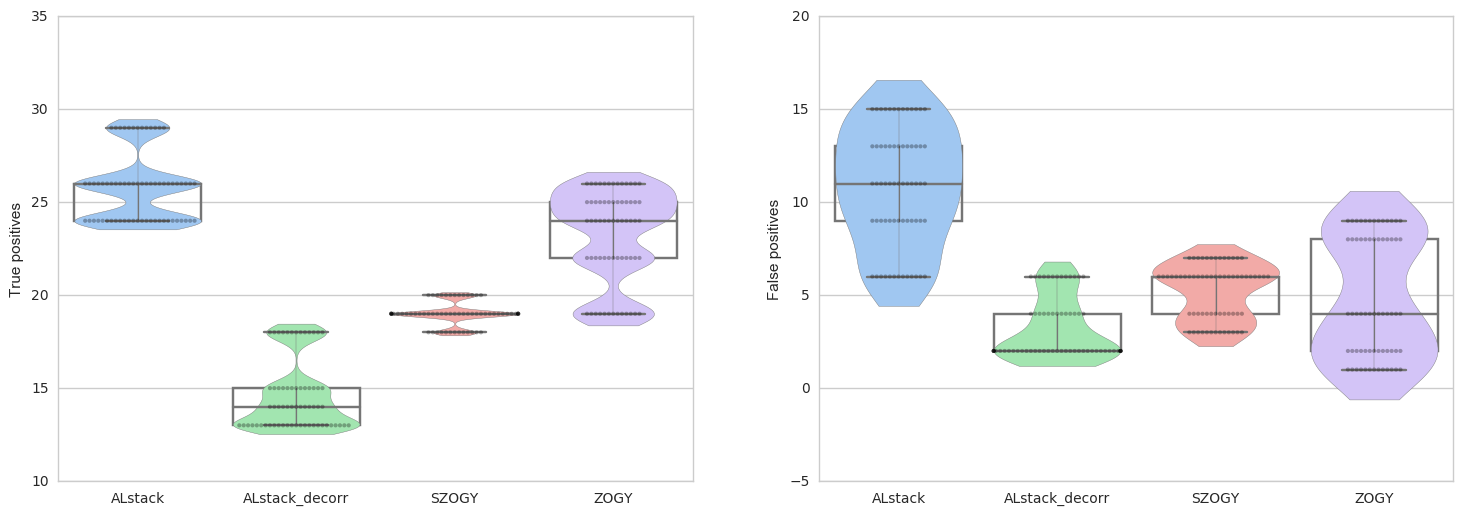

In [12]:
import diffimTests as dit
dit.multi.plotResults(testResults4, resultKey='diffimResInputPsf');

FN: 
ALstack           24.071429
ALstack_decorr    35.267857
SZOGY             31.857143
ZOGY              27.553571
dtype: float64
FP: 
ALstack           10.589286
ALstack_decorr     3.107143
SZOGY              5.964286
ZOGY               5.446429
dtype: float64
TP: 
ALstack           25.928571
ALstack_decorr    14.732143
SZOGY             18.142857
ZOGY              22.446429
dtype: float64


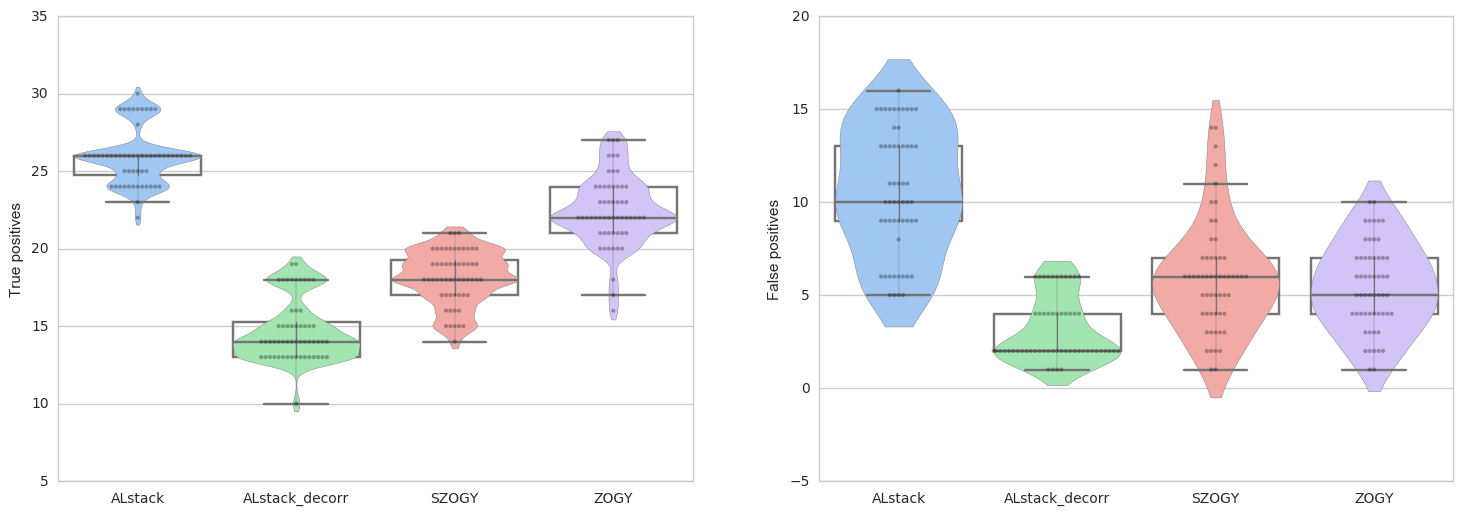

In [13]:
dit.multi.plotResults(testResults4, resultKey='diffimResMeasuredPsf');

65 56


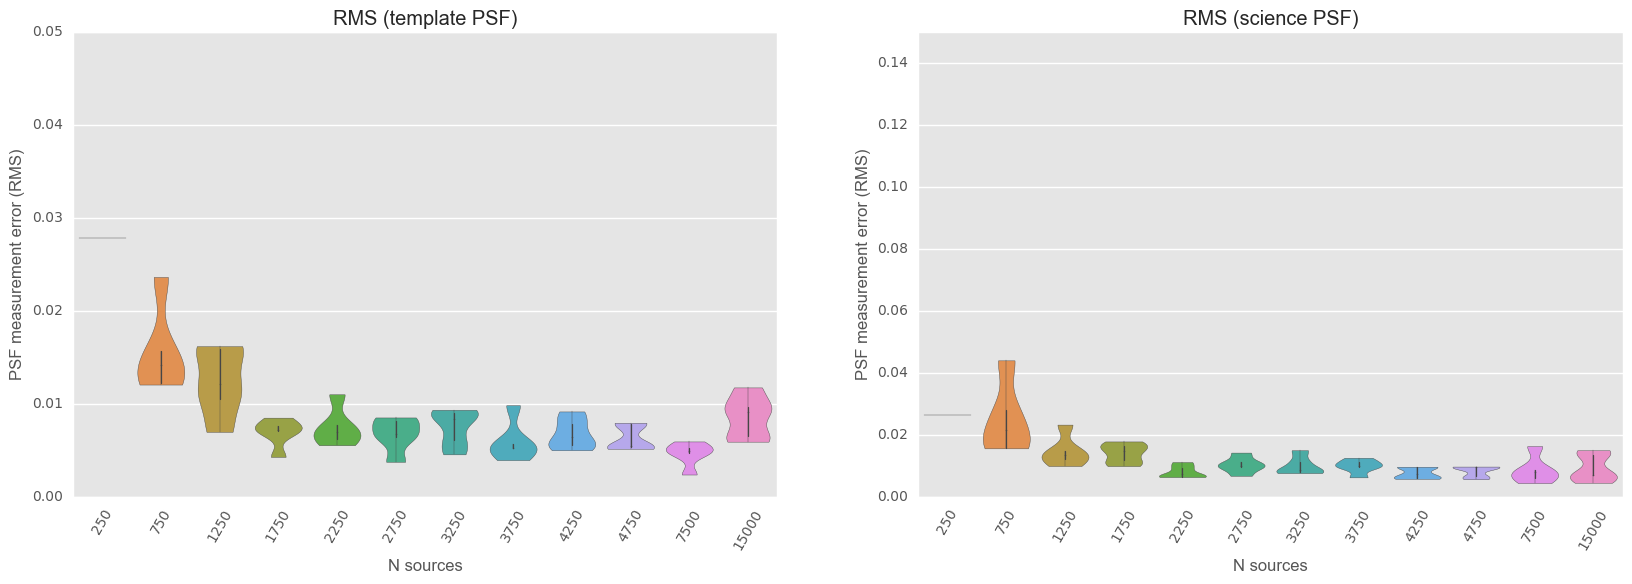

In [28]:
for tr in testResults4:
    tr['n_sources'] = tr['nSources']
plotMeasuredPsfsResults(testResults4, resultKey='resultPsfRms', methods=['ALstack_decorr', 'ZOGY']);

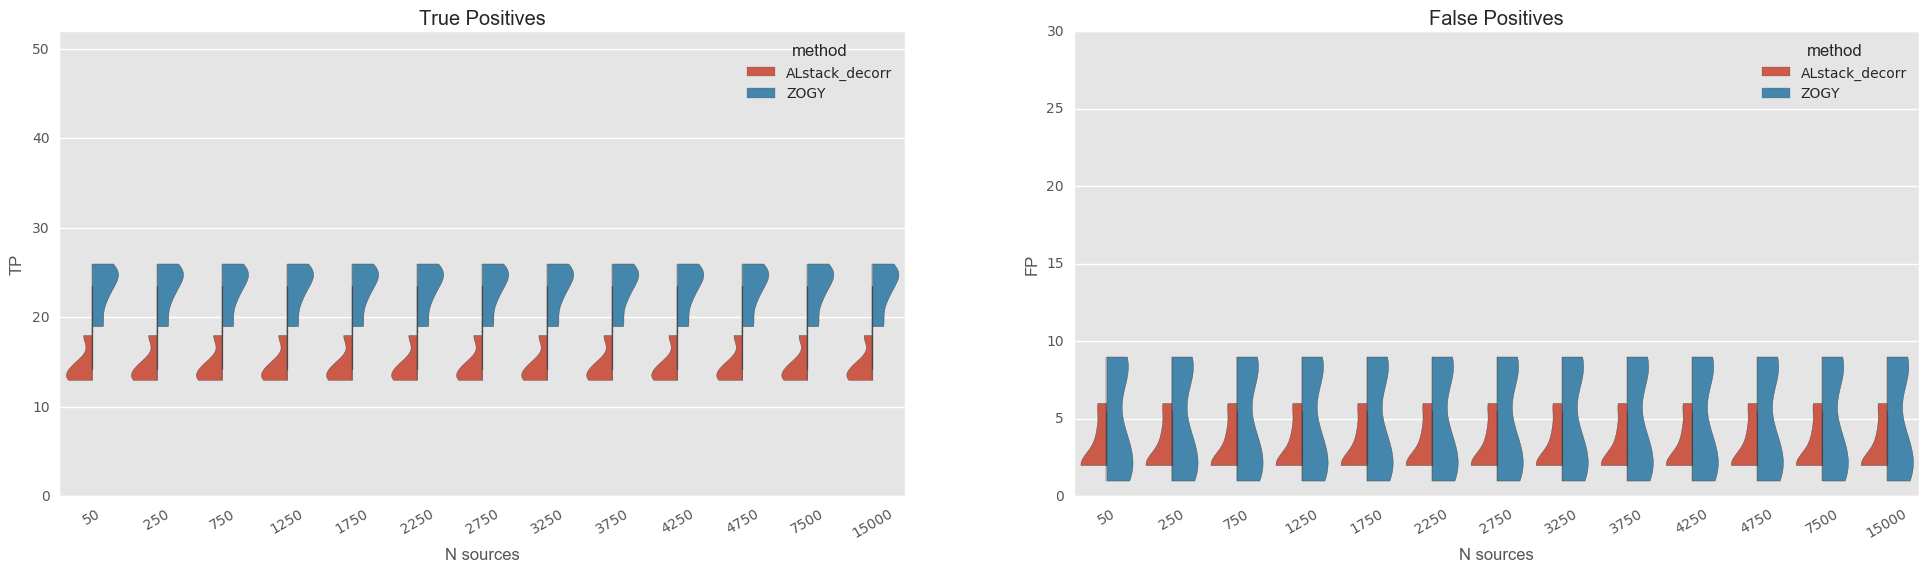

In [20]:
for tr in testResults4:
    tr['n_sources'] = tr['nSources']
plotMeasuredPsfsResults(testResults4, resultKey='diffimResInputPsf', methods=['ALstack_decorr', 'ZOGY']);

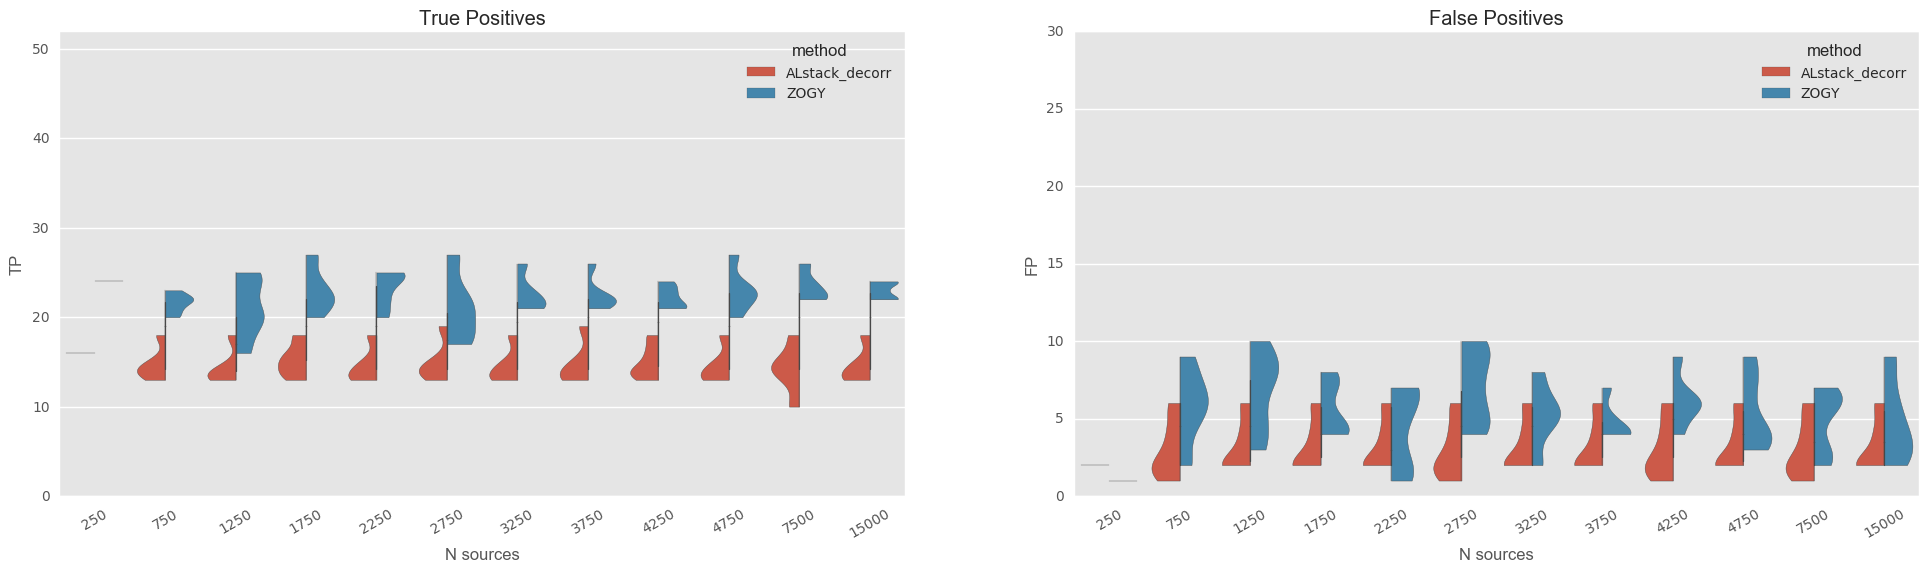

In [21]:
for tr in testResults4:
    tr['n_sources'] = tr['nSources']
plotMeasuredPsfsResults(testResults4, resultKey='diffimResMeasuredPsf', methods=['ALstack_decorr', 'ZOGY']);

OK, now I moved the ORIG code into the "new" `diffimTests`. Let's try it for good.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import diffimTests as dit

In [2]:
n_runs = 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
#ns = ns[::2]
testResults5 = dit.multi.runMultiDiffimTestsORIG(varSourceFlux=620.*np.sqrt(2.), 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=False, skyLimited=False,
                                             sky=[300., 300.], #sourceFluxRange=(500,30000),
                                             #avoidAllOverlaps=0.,
                                             n_runs=n_runs) #, remeasurePsfs=[True, True])

RUNNING: 250
CORES: 4

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Po

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.2min



  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::im

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 10.6min
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed: 37.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 50.3min finished


250 219


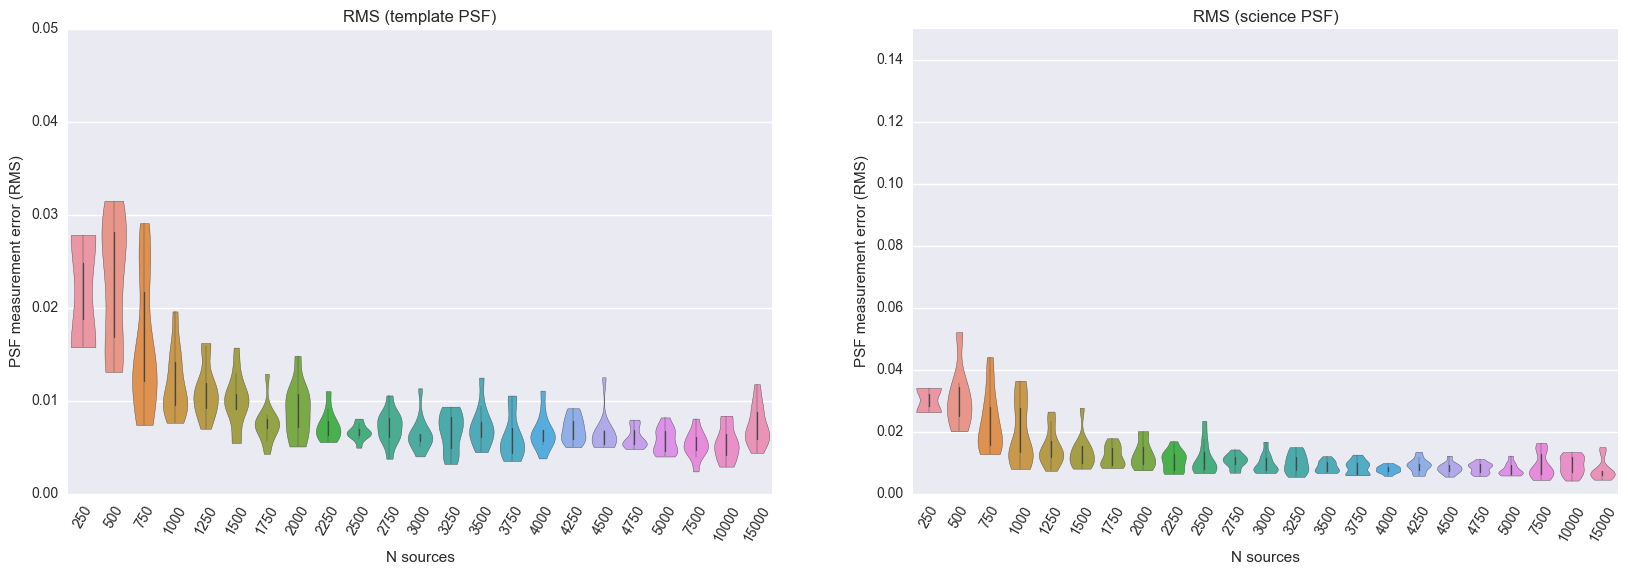

In [3]:
dit.multi.plotMeasuredPsfsResults(testResults5, resultKey='resultPsfRms', methods=['ALstack_decorr', 'ZOGY']);

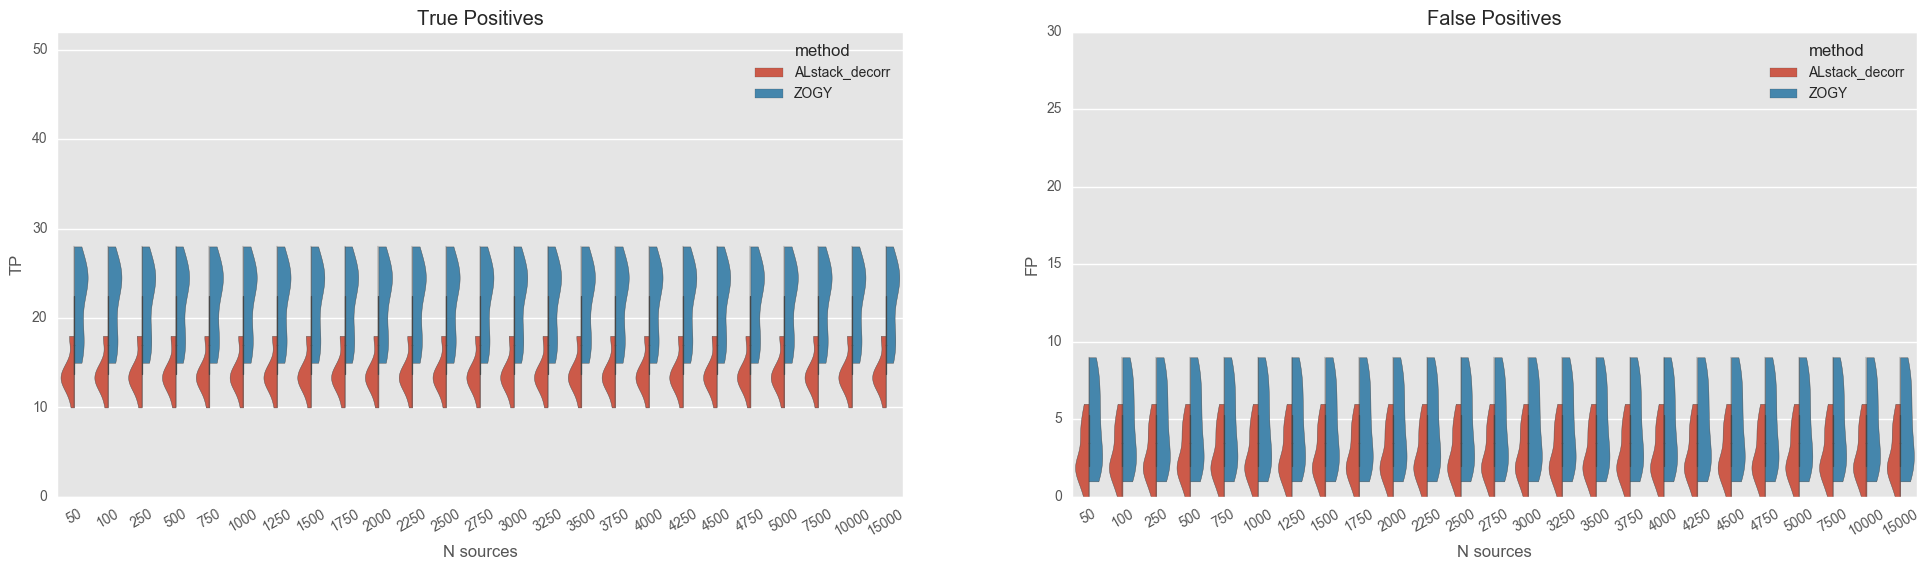

In [4]:
dit.multi.plotMeasuredPsfsResults(testResults5, resultKey='diffimResInputPsf', methods=['ALstack_decorr', 'ZOGY']);

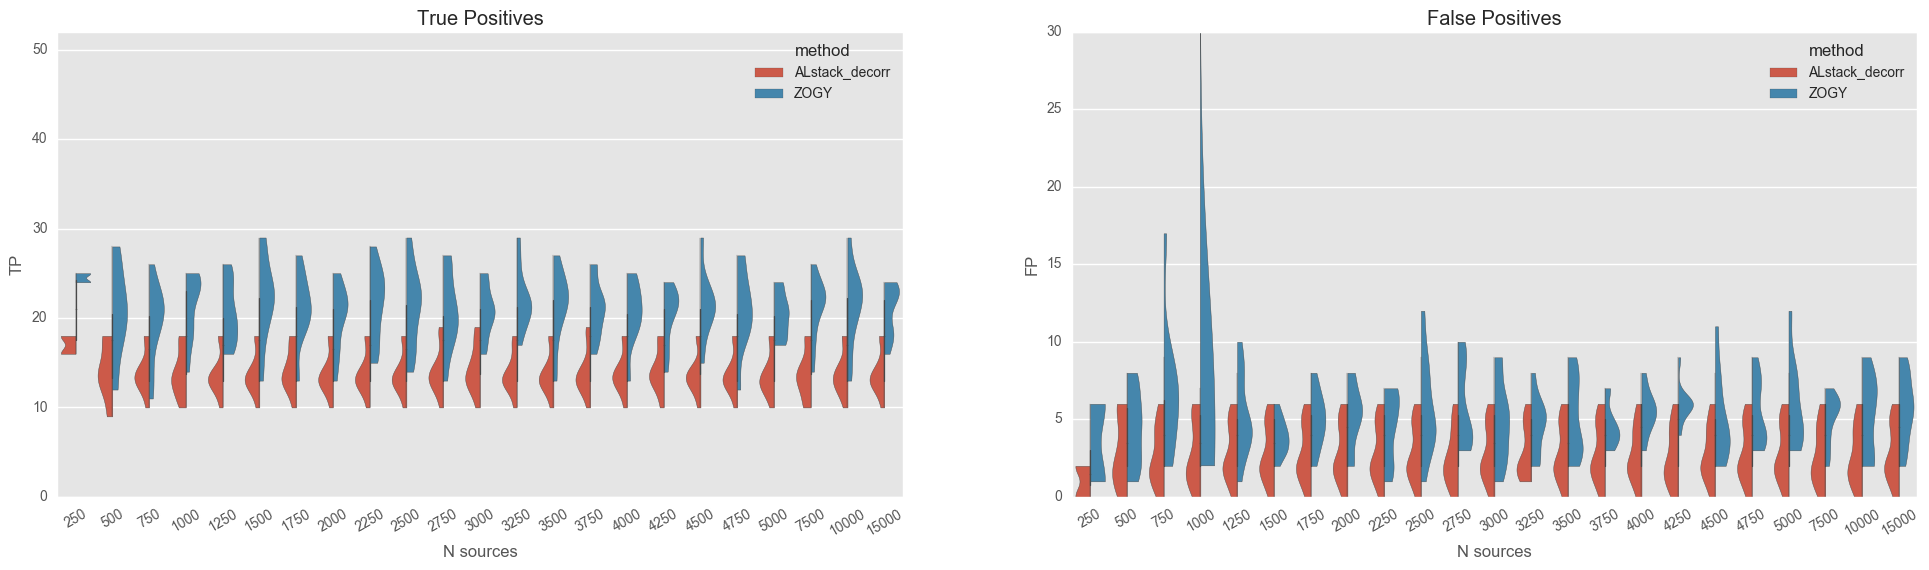

In [5]:
dit.multi.plotMeasuredPsfsResults(testResults5, resultKey='diffimResMeasuredPsf', methods=['ALstack_decorr', 'ZOGY']);

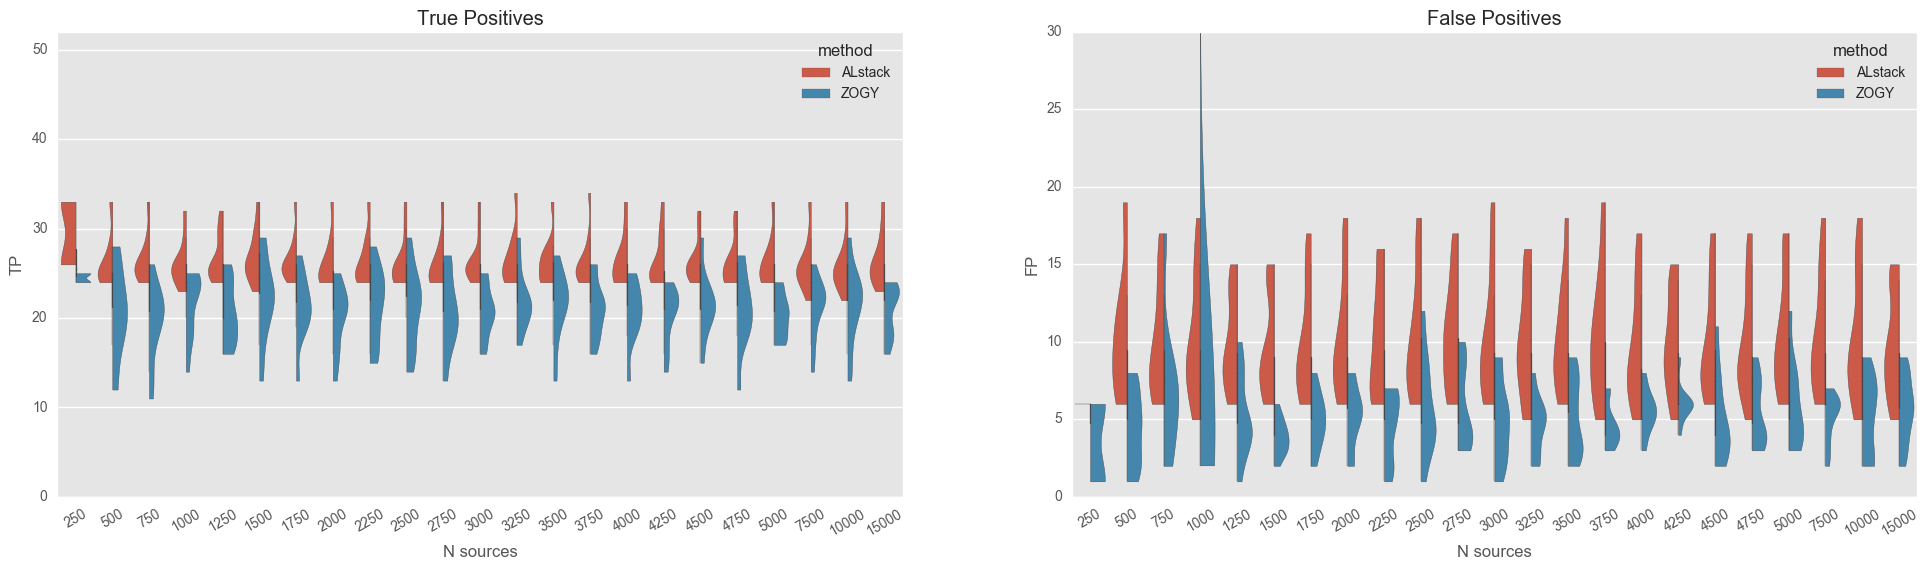

In [6]:
dit.multi.plotMeasuredPsfsResults(testResults5, resultKey='diffimResMeasuredPsf', methods=['ALstack', 'ZOGY']);

In [7]:
n_runs = 50
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000, 20000, 50000])
#ns = ns[::2]
testResults6 = dit.multi.runMultiDiffimTestsORIG(varSourceFlux=620.*np.sqrt(2.), 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=False, skyLimited=False,
                                             sky=[300., 300.], #sourceFluxRange=(500,30000),
                                             #avoidAllOverlaps=0.,
                                             n_runs=n_runs) #, remeasurePsfs=[True, True])

RUNNING: 1350
CORES: 4

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::P

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.3min



  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::im

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  5.8min



  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::im

[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed: 18.7min



  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'


  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'



[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed: 41.8min
[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed: 77.6min
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 129.6min


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 1193 tasks      | elapsed: 208.7min


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 1350 out of 1350 | elapsed: 258.3min finished


1350 1149


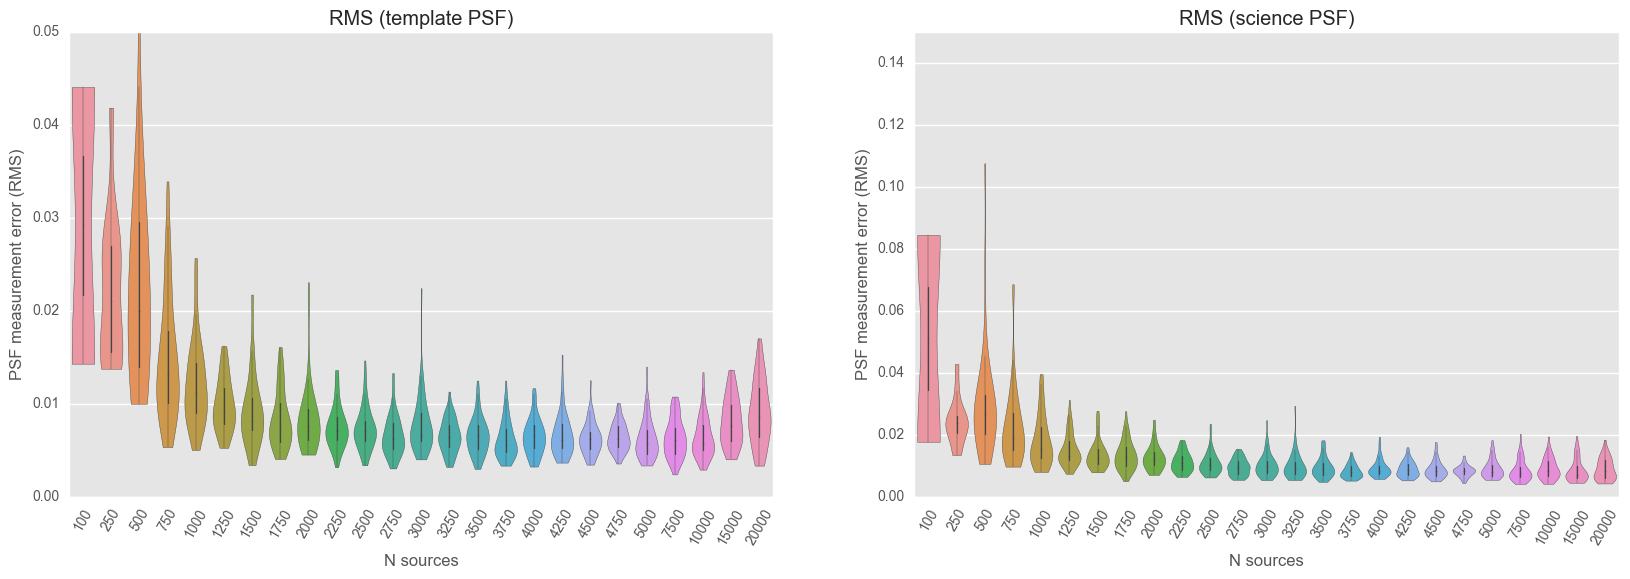

In [8]:
dit.multi.plotMeasuredPsfsResults(testResults6, resultKey='resultPsfRms', methods=['ALstack_decorr', 'ZOGY']);

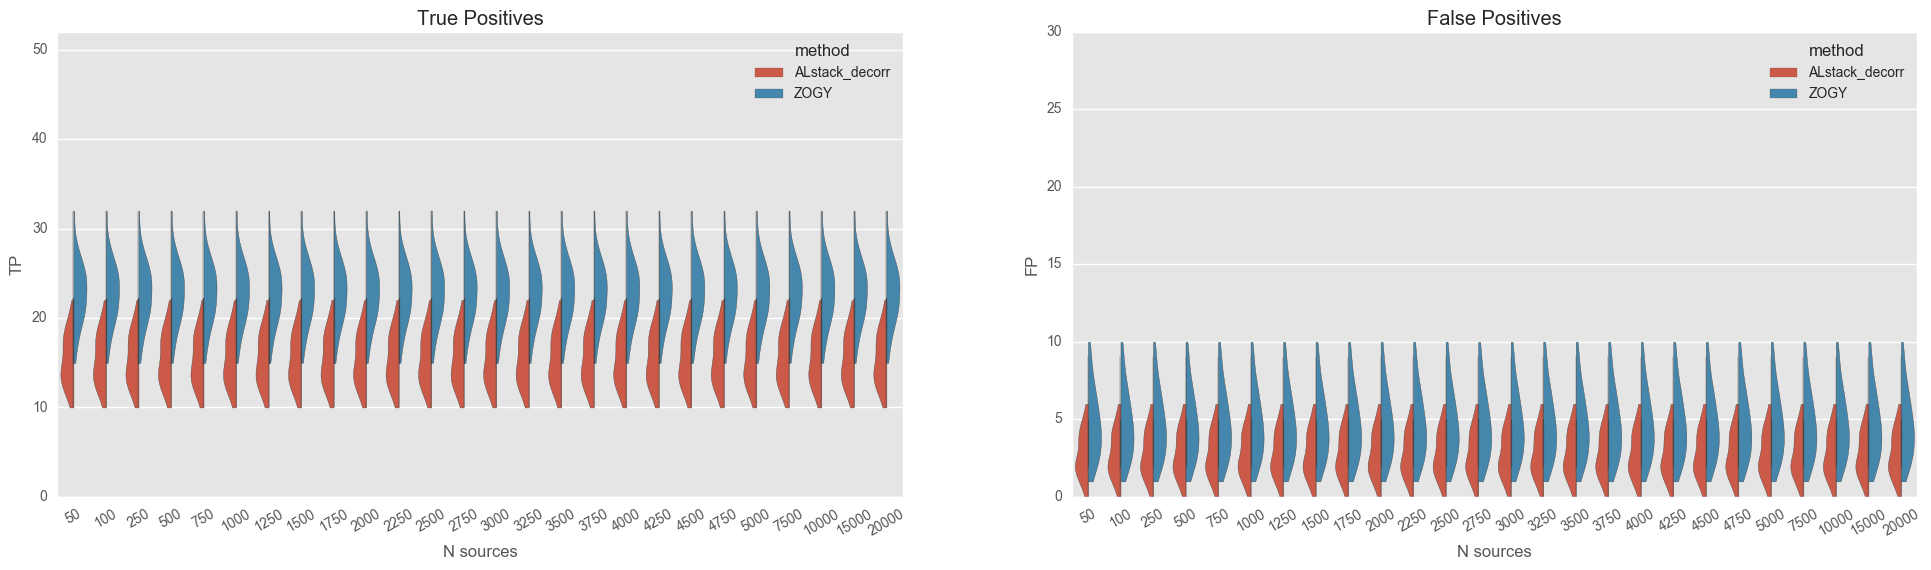

In [9]:
dit.multi.plotMeasuredPsfsResults(testResults6, resultKey='diffimResInputPsf', methods=['ALstack_decorr', 'ZOGY']);

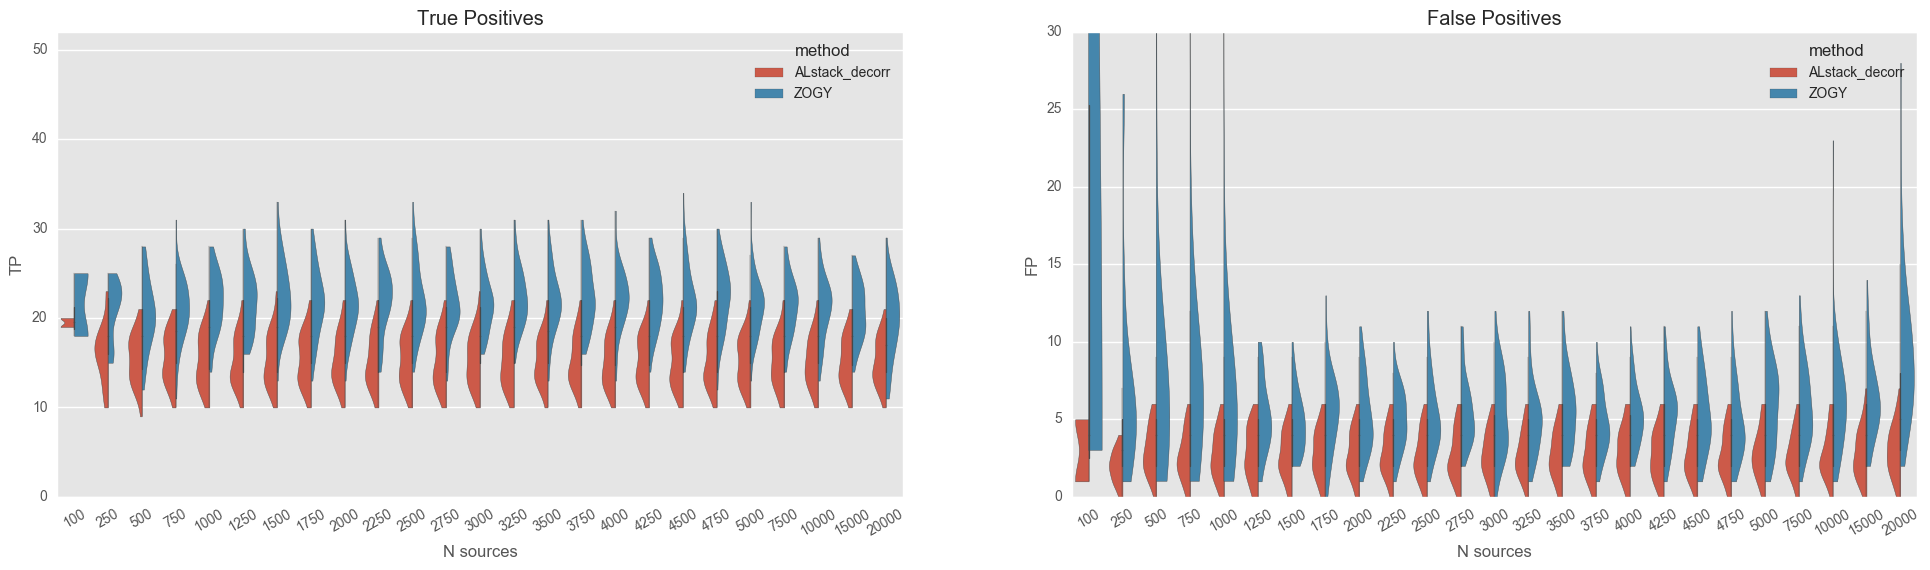

In [10]:
dit.multi.plotMeasuredPsfsResults(testResults6, resultKey='diffimResMeasuredPsf', methods=['ALstack_decorr', 'ZOGY']);

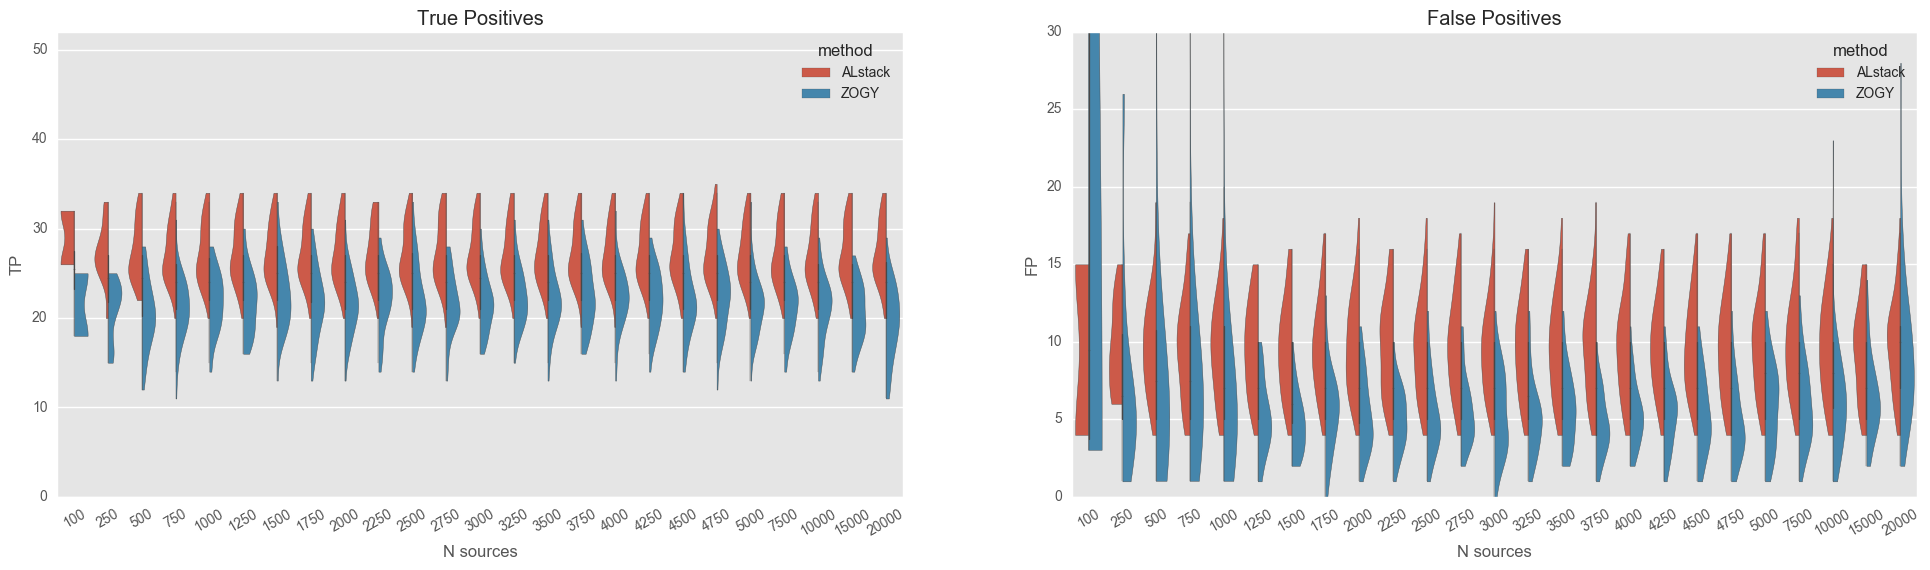

In [11]:
dit.multi.plotMeasuredPsfsResults(testResults6, resultKey='diffimResMeasuredPsf', methods=['ALstack', 'ZOGY']);

In [13]:
dit.dumpObjects((testResults5, testResults6), '32. b. new tests vs static source density and psf measurement')